# Exercise 8: Models of Segregation 

Mesut Cylan (18-748-012), Syed Shahvaiz Ahmed (18-756-635)

MOEC0559 Agent-based modeling for Business, Economics, Informatics and Social Science
Faculty of Business, Economics and Informatics

16.05.2019

# Modules

In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

# Spatial Proximity Model

In [20]:
class Schelling:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width 
        self.height = height 
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}
 
    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)
 
        self.n_empty = int( self.empty_ratio * len(self.all_houses) )
        self.empty_houses = self.all_houses[:self.n_empty]
 
        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            #create agents for each race
            self.agents = dict(
                            list(self.agents.items()) +
                            list(dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))).items())
                        )
 
    def is_unsatisfied(self, x, y):
        race = self.agents[(x,y)]
        count_similar = 0
        count_different = 0

        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1, y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1

        if (count_similar+count_different) == 0:
            return False
        else:
            return float(count_similar)/(count_similar+count_different) < self.similarity_threshold
 
    def update(self):        
        for i in range(self.n_iterations):
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            print (n_changes)
            if n_changes == 0:
                break
         
    def move_to_empty(self, x, y):
        race = self.agents[(x,y)]
        empty_house = random.choice(self.empty_houses)
        self.updated_agents[empty_house] = race
        del self.updated_agents[(x, y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x, y))
        
    
    def calculate_similarity(self):
        similarity = []
        for agent in self.agents:
            count_similar = 0
            count_different = 0
            x = agent[0]
            y = agent[1]
            race = self.agents[(x,y)]
            if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
                if self.agents[(x-1, y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if y > 0 and (x,y-1) not in self.empty_houses:
                if self.agents[(x,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and (x-1,y) not in self.empty_houses:
                if self.agents[(x-1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and (x+1,y) not in self.empty_houses:
                if self.agents[(x+1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
                if self.agents[(x,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            try:
                similarity.append(float(count_similar)/(count_similar+count_different))
            except:
                similarity.append(1)
        return sum(similarity)/len(similarity)
    

49
11
2
3
0
112
45
24
16
11
3
1
3
3
1
1
0
189
91
49
32
22
8
7
5
2
0
215
102
62
41
24
8
4
2
2
1
1
0
334
214
144
85
62
44
28
17
10
5
3
4
4
2
1
0
500
385
313
278
208
182
177
142
136
119
124
100
89
79
57
52
45
29
15
16
20
17
13
10
7
10
10
7
5
4
2
1
0
560
497
476
439
445
453
453
416
382
394
396
378
375
367
418
437
422
422
432
406
420
417
405
405
400
383
393
399
410
429
437
416
449
418
387
411
435
439
429
425
415
442
401
418
422
428
385
381
386
384
370
394
384
380
389
383
379
392
422
404
366
380
397
386
367
333
331
359
390
398
374
359
400
392
390
393
385
384
390
372
383
404
367
336
309
321
329
317
318
317
317
322
329
316
343
335
314
331
315
311
303
309
318
328
323
340
339
333
352
365
360
359
346
344
345
372
396
374
374
357
365
375
358
360
379
370
365
369
388
385
365
341
352
343
349
364
336
350
329
354
343
352
352
350
366
329
332
341
344
367
369
348
363
376
383
392
364
380
398
421
431
406
419
426
387
395
419
402
372
359
359
353
374
340
369
360
376
402
390
380
346
354
328
339
395
427
411
369
3

406
416
403
430
413
420
423
410
416
385
409
421
441
465
445
442
404
381
391
390
402
405
418
391
396
372
389
399
417
397
384
400
386
403
390
388
393
400
372
375
350
343
368
356
338
339
310
336
344
331
332
339
321
321
321
324
347
351
374
377
360
387
404
395
381
403
382
400
404
393
381
394
373
377
406
407
393
373
371
372
368
362
375
429
437
413
397
410
421
432
426
443
432
422
413
418
405
401
414
367
367
403
385
395
400
403
435
432
420
398
402
443
434
443
439
431
421
413
425
460
444
459
475
468
465
464
472
456
450
447
434
435
426
432
431
430
419
392
379
362
390
408
392
339
360
357
361
353
351
376
405
351
363
371
381
356
384
400
413
403
415
396
409
432
449
444
418
417
420
430
390
398
413
420
436
407
427
406
408
403
394
406
405
437
452
480
463
451
429
432
434
420
419
393
391
393
384
418
421
407
425
414
373
390
403
398
414
406
385
378
366
380
374
359
373
389
405
416
444
416
392
396
398
382
397
405
425
433
421
459
423
416
443
428
403
408
390
374
369
331
305
301
333
362
356
352
375
375
348
362


593
582
571
573
574
586
592
596
592
589
575
580
589
588
588
592
586
588
575
584
596
591
593
584
580
599
589
583
587
594
589
582
584
605
595
591
590
592
593
596
598
590
591
581
576
595
597
586
583
585
590
571
570
578
589
589
578
601
586
591
582
590
585
603
587
595
589
593
582
593
599
584
598
589
597
589
591
591
598
585
578
583
574
576
580
595
579
605
589
577
583
594
591
603
593
595
569
581
588
596
600
576
579
580
580
590
578
578
590
592
578
582
588
580
591
597
594
599
589
581
589
583
577
575
591
584
581
591
594
585
591
578
575
578
585
590
594
576
573
576
574
579
588
573
569
571
582
591
592
581
572
578
585
578
586
587
590
597
590
580
594
601
601
595
595
601
588
575
584
597
591
584
596
595
586
592
598
584
596
599
594
578
586
577
573
592
604
589
592
586
593
579
602
587
587
588
585
571
581
586
583
580
597
600
599
587
580
579
583
578
583
595
596
596
592
575
566
588
591
603
594
581
594
600
584
580
580
590
581
590
594
578
597
598
587
586
586
583
596
593
594
594
587
569
576
581
589
583
604
583


602
584
595
587
576
592
572
575
592
600
586
571
587
580
580
582
578
579
588
597
592
593
593
585
598
590
593
591
594
578
582
587
585
585
600
604
580
594
596
584
581
585
591
578
586
587
575
571
589
588
599
589
574
580
588
588
593
575
586
583
584
561
574
587
586
589
598
593
584
599
582
587
594
599
585
588
591
574
588
582
575
573
576
575
589
580
575
586
583
593
588
586
585
591
597
588
582
589
589
595
597
602
583
587
592
595
593
592
588
588
583
592
605
590
596
598
596
597
578
585
581
593
586
578
586
588
599
594
595
598
590
590
590
598
593
599
592
581
583
588
584
583
591
595
597
582
585
578
591
586
587
585
579
597
597
589
582
583
560
578
587
593
594
588
592
573
573
581
580
567
583
593
591
588
565
582
581
587
589
583
576
579
590
572
580
575
594
600
593
592
590
587
578
586
591
584
568
587
593
574
593
601
579
567
581
593
580
595
588
590
581
594
580
582
578
573
585
586
596
598
579
581
600
580
590
590
591
595
603
593
591
590
606
603
598
580
586
602
588
575
575
596
590
603
588
589
594
572
592
600


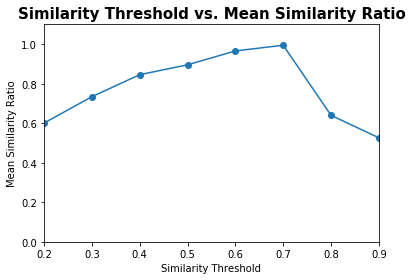

In [24]:
similarity_threshold_ratio = {}
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    schelling = Schelling(30, 30, 0.3, i, 4000, 2)
    schelling.populate()
    schelling.update()
    similarity_threshold_ratio[i] = schelling.calculate_similarity()
 
fig, ax = plt.subplots()
plt.plot(similarity_threshold_ratio.keys(), similarity_threshold_ratio.values(), '-o')
ax.set_title('Similarity Threshold vs. Mean Similarity Ratio', fontsize=15, fontweight='bold')
ax.set_xlim([0.2, 0.9])
ax.set_ylim([0, 1.1])
ax.set_xlabel("Similarity Threshold")
ax.set_ylabel("Mean Similarity Ratio")
plt.savefig('schelling_segregation_measure.png')